
### 2017.10.18
# Ted_Edu_Corpus_Analysis: Science vs. Non-Science
### 한수미

공식사이트: https://ed.ted.com/
- 수업자료들 video/scripts 레벨별/토픽별 다양한 수업자료들(영어, 한국어 등); 정제되어 있는 데이터
- 연구목적(Copyright 참고):https://www.ted.com/about/our-organization/our-policies-terms/ted-com-terms-of-use
A majority of TED Content is licensed under Creative Commons. We ask that you do not distribute our Content without prior permission. Please read our Usage Policy link for further terms.
- Usage Policy: https://www.ted.com/about/our-organization/our-policies-terms/ted-talks-usage-policy


참고한 자료들/사이트들
1. http://pannacotta.tistory.com/51 [Shimmering Green]
2. http://rstudio-pubs-static.s3.amazonaws.com/12889_1f3f2aec291941c08f5944d62295f241.html
3. http://blog.naver.com/PostView.nhn?blogId=dfdf4912&logNo=220620420409&parentCategoryNo=&categoryNo=48&viewDate=&isShowPopularPosts=true&from=search
4. Text Mining with R - A Tidy Approach by Silge & Robinson : http://tidytextmining.com/usenet.html
5. tidyverse 데이터 과학 기본체계: http://statkclee.github.io/data-science/ds-tidyverse.html

## 테드 데이터 구조

- std_level(5 levels): Elmentary/Primary, Middle School/Lower Secondary, High School/Upper Secondary,College/University, Other
- category_list(12 categories; mixed): the-arts, business-economics, design-engineering-technology, health, literature-language, mathematics, philosophy-religion, psychology,science-technology, social-studies, teaching-education, thinking-learning 

- author, time, views 
- Data Crawling/Preprocessing with Scrapy, Python; 왠만한 전처리는 파이썬으로 했습니다. ㅠ.ㅠ 

## 들어가면서 

- 테이터 카테고리에 문제가 있어서 Science vs. Non_Science로 구분지음
- 총 파일 578개 파일들 
- Text Mining with R 코드 주로 참고

### R로 분석시작: tidy data? 넌 도대체 누구길래...

In [1]:
library(tm)
library(tidyverse)
library(DT) #data table
library(stringr) # string 처리
library(tidytext)
#library(ggthemes)
#library(extrafont)
#loadfonts()
#install.packages('tidytext')
#install.packages('extrafont')

Loading required package: NLP
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
annotate(): ggplot2, NLP
filter():   dplyr, stats
lag():      dplyr, stats


In [2]:
getwd()

[1] "/Users/hansumi"

### 1. 테드에듀 코퍼스 살펴보기

In [3]:
library(dplyr)
library(tidyr)
library(purrr)
library(readr)

Ted_edu_eng <- "/Users/hansumi/Downloads/Ted_edu_eng/"

#### Preprocessing

In [7]:
# Define a function to read all files from a folder into a data frame
read_folder <- function(infolder){
    data_frame(file = dir(infolder, full.names = TRUE)) %>%
    mutate(text = map(file, read_lines)) %>%
    transmute(id = basename(file), text) %>%
    unnest(text)
}

In [54]:
# unnest() and map() to apply read_folder to each subfolder

raw_text <- data_frame(folder= dir(Ted_edu_eng, full.names = TRUE)) %>%
    unnest(map(folder, read_folder)) %>%
    transmute(category = basename(folder), id, text)    #category: Science, Non_Science
raw_text

category   
1   Non_Science
2   Non_Science
3   Non_Science
4   Non_Science
5   Non_Science
6   Non_Science
7   Non_Science
8   Non_Science
9   Non_Science
10  Non_Science
11  Non_Science
12  Non_Science
13  Non_Science
14  Non_Science
15  Non_Science
16  Non_Science
17  Non_Science
18  Non_Science
19  Non_Science
20  Non_Science
21  Non_Science
22  Non_Science
23  Non_Science
24  Non_Science
25  Non_Science
26  Non_Science
27  Non_Science
28  Non_Science
29  Non_Science
30  Non_Science
⋮   ⋮          
549 Science    
550 Science    
551 Science    
552 Science    
553 Science    
554 Science    
555 Science    
556 Science    
557 Science    
558 Science    
559 Science    
560 Science    
561 Science    
562 Science    
563 Science    
564 Science    
565 Science    
566 Science    
567 Science    
568 Science    
569 Science    
570 Science    
571 Science    
572 Science    
573 Science    
574 Science    
575 Science    
576 Science    
577 Science    
578 Science    
    id                                                                                         
1   3 tips to boost your confidence - TED-Ed-en.srt.txt                                        
2   5 tips to improve your critical thinking - Samantha Agoos-en.srt.txt                       
3   8 traits of successful people - Richard St. John-en.srt.txt                                
4   A 3-minute guide to the Bill of Rights - Belinda Stutzman-en.srt.txt                       
5   A brief history of melancholy - Courtney Stephens-en.srt.txt                               
6   A brief history of plural word.s - John McWhorter-en.srt.txt                               
7   A brief history of religion in art - TED-Ed-en.srt.txt                                     
8   A brief history of video games (Part I) - Safwat Saleem-en.srt.txt                         
9   A call to invention_ DIY speaker edition - William Gurstelle-en.srt.txt                    
10  A clever way to estimate enormous numbers - Michael Mitchell-en.srt.txt                    
11  A different way to visualize rhythm - John Varney-en.srt.txt                               
12  A giant bubble for debate - Liz Diller-en.srt.txt                                          
13  A glimpse of teenage life in ancient Rome - Ray Laurence-en.srt.txt                        
14  A poetic experiment_ Walt Whitman_ interpreted by three animators - Justin Moore-en.srt.txt
15  A tap dancer_s craft - Andrew Nemr-en.srt.txt                                              
16  A-rhythm-etic. The math behind the beats - Clayton Cameron-en.srt.txt                      
17  An anti-hero of one_s own - Tim Adams-en.srt.txt                                           
18  An exercise in time perception - Matt Danzico-en.srt.txt                                   
19  Are Elvish_ Klingon_ Dothraki and Na_vi real languages - John McWhorter-en.srt.txt         
20  At what moment are you dead - Randall Hayes-en.srt.txt                                     
21  Beach Bodies (in spoken word) - David Fasanya and Gabriel Barralaga-en.srt.txt             
22  Beatboxing 101 - BEAT NYC-en.srt.txt                                                       
23  Beware of nominalizations (AKA zombie nouns) - Helen Sword-en.srt.txt                      
24  Birth of a nickname - John McWhorter-en.srt.txt                                            
25  Buffalo buffalo buffalo_ One-word sentences and how they work - Emma Bryce-en.srt.txt      
26  Building a museum of museums on the web - Amit Sood-en.srt.txt                             
27  Can robots be creative - Gil Weinberg-en.srt.txt                                           
28  Can you solve the bridge riddle - Alex Gendler-en.srt.txt                                  
29  Can you solve the frog riddle - Derek Abbott-en.srt.txt                                    
30  Can you solve the locker riddle - Lisa Winer-en.srt.txt                                    
⋮   ⋮                               

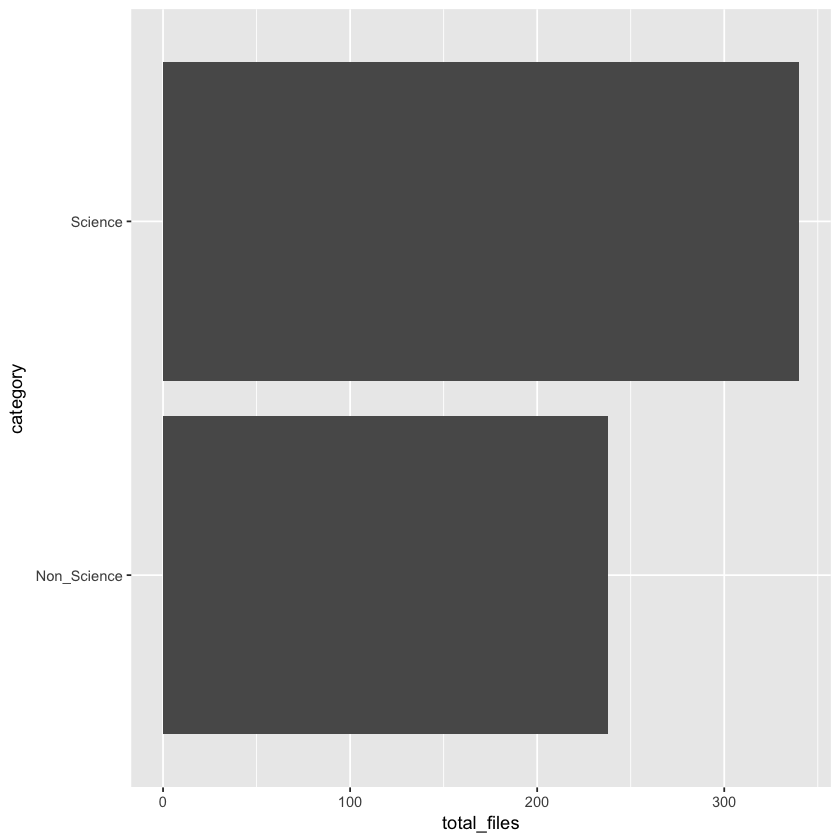

In [55]:
library(ggplot2)

raw_text %>%
  group_by(category) %>%
  summarize(total_files = n_distinct(id))  %>%
  ggplot(aes(category, total_files)) +
  geom_col() +
  coord_flip()
#total_files: Science: 340; Non_Science: 248

#### Processing text

In [39]:
# unnest_tokens() for tokenization to split the dataset into tokens while removing stop words

library(tidytext)
data(stop_words)   

ted_words <- raw_text %>%
   unnest_tokens(word, text) %>%
   filter(str_detect(word, "[a-z']$"),
         !word %in% stop_words$word)   #stop_words 제거

ted_words

category   
1      Non_Science
2      Non_Science
3      Non_Science
4      Non_Science
5      Non_Science
6      Non_Science
7      Non_Science
8      Non_Science
9      Non_Science
10     Non_Science
11     Non_Science
12     Non_Science
13     Non_Science
14     Non_Science
15     Non_Science
16     Non_Science
17     Non_Science
18     Non_Science
19     Non_Science
20     Non_Science
21     Non_Science
22     Non_Science
23     Non_Science
24     Non_Science
25     Non_Science
26     Non_Science
27     Non_Science
28     Non_Science
29     Non_Science
30     Non_Science
⋮      ⋮          
150768 Science    
150769 Science    
150770 Science    
150771 Science    
150772 Science    
150773 Science    
150774 Science    
150775 Science    
150776 Science    
150777 Science    
150778 Science    
150779 Science    
150780 Science    
150781 Science    
150782 Science    
150783 Science    
150784 Science    
150785 Science    
150786 Science    
150787 Science    
150788 Science    
150789 Science    
150790 Science    
150791 Science    
150792 Science    
150793 Science    
150794 Science    
150795 Science    
150796 Science    
150797 Science    
       id                                                           
1      3 tips to boost your confidence - TED-Ed-en.srt.txt          
2      3 tips to boost your confidence - TED-Ed-en.srt.txt          
3      3 tips to boost your confidence - TED-Ed-en.srt.txt          
4      3 tips to boost your confidence - TED-Ed-en.srt.txt          
5      3 tips to boost your confidence - TED-Ed-en.srt.txt          
6      3 tips to boost your confidence - TED-Ed-en.srt.txt          
7      3 tips to boost your confidence - TED-Ed-en.srt.txt          
8      3 tips to boost your confidence - TED-Ed-en.srt.txt          
9      3 tips to boost your confidence - TED-Ed-en.srt.txt          
10     3 tips to boost your confidence - TED-Ed-en.srt.txt          
11     3 tips to boost your confidence - TED-Ed-en.srt.txt          
12     3 tips to boost your confidence - TED-Ed-en.srt.txt          
13     3 tips to boost your confidence - TED-Ed-en.srt.txt          
14     3 tips to boost your confidence - TED-Ed-en.srt.txt          
15     3 tips to boost your confidence - TED-Ed-en.srt.txt          
16     3 tips to boost your confidence - TED-Ed-en.srt.txt          
17     3 tips to boost your confidence - TED-Ed-en.srt.txt          
18     3 tips to boost your confidence - TED-Ed-en.srt.txt          
19     3 tips to boost your confidence - TED-Ed-en.srt.txt          
20     3 tips to boost your confidence - TED-Ed-en.srt.txt          
21     3 tips to boost your confidence - TED-Ed-en.srt.txt          
22     3 tips to boost your confidence - TED-Ed-en.srt.txt          
23     3 tips to boost your confidence - TED-Ed-en.srt.txt          
24     3 tips to boost your confidence - TED-Ed-en.srt.txt          
25     3 tips to boost your confidence - TED-Ed-en.srt.txt          
26     3 tips to boost your confidence - TED-Ed-en.srt.txt          
27     3 tips to boost your confidence - TED-Ed-en.srt.txt          
28     3 tips to boost your confidence - TED-Ed-en.srt.txt          
29     3 tips to boost your confidence - TED-Ed-en.srt.txt          
30     3 tips to boost your confidence - TED-Ed-en.srt.txt          
⋮      ⋮                                                            
150768 Would you weigh less in an elevator - Carol Hedden-en.srt.txt
150769 Would you weigh less in an elevator - Carol Hedden-en.srt.txt
150770 Would you weigh less in an elevator - Carol Hedden-en.srt.txt
150771 Would you weigh less in an elevator - Carol Hedden-en.srt.txt
150772 Would you weigh less in an elevator - Carol Hedden-en.srt.txt
150773 Would you weigh less in an elevator - Carol Hedden-en.srt.txt
150774 Would you weigh less in an elevator - Carol Hedden-en.srt.txt
150775 Would you weigh less in an elevator - Carol Hedden-en.srt.txt
150776 Would you weigh less in an elevator - Carol Hedden-en.srt.txt


In [10]:
# Words in Science vs. Non-Science of Ted Edu Corpus
# Most Common Words for the whole corpus
ted_words %>%
 count(word, sort = TRUE)

word        n  
1     time        857
2     people      697
3     called      553
4     water       514
5     world       503
6     energy      478
7     light       475
8     cells       450
9     brain       384
10    body        372
11    life        367
12    earth       326
13    space       321
14    human       317
15    day         300
16    system      259
17    blood       241
18    scientists  240
19    molecules   236
20    power       234
21    change      231
22    form        230
23    air         224
24    food        224
25    times       224
26    words       217
27    found       216
28    move        215
29    means       204
30    particles   200
⋮     ⋮           ⋮  
20936 yorkers     1  
20937 yuri        1  
20938 z's         1  
20939 zacharias   1  
20940 zakat       1  
20941 zamacueca   1  
20942 zarya       1  
20943 zealous     1  
20944 zebra       1  
20945 zebrafish's 1  
20946 zefiro      1  
20947 zen         1  
20948 zenith      1  
20949 zephyr      1  
20950 zephyrus    1  
20951 zhang       1  
20952 zheng       1  
20953 zhou        1  
20954 zing        1  
20955 zip         1  
20956 zippy       1  
20957 zirconium   1  
20958 zitii       1  
20959 zits        1  
20960 zoomed      1  
20961 zooming     1  
20962 zooplankton 1  
20963 zoos        1  
20964 zvezda      1  
20965 zygote      1

In [19]:
# Words by Category
words_by_category <- ted_words %>%
 count(category, word, sort = TRUE) %>%
 ungroup()

words_by_category

category    word        n  
1     Science     time        475
2     Science     water       460
3     Science     light       428
4     Science     cells       420
5     Non_Science people      407
6     Science     energy      400
7     Science     called      394
8     Non_Science time        382
9     Science     body        302
10    Science     earth       297
11    Science     people      290
12    Science     brain       279
13    Science     world       267
14    Science     space       266
15    Non_Science world       236
16    Science     life        224
17    Science     blood       208
18    Science     scientists  207
19    Science     molecules   203
20    Science     human       196
21    Science     system      194
22    Science     air         188
23    Science     cell        173
24    Science     particles   173
25    Science     atoms       172
26    Non_Science words       169
27    Non_Science music       166
28    Science     day         160
29    Non_Science called      159
30    Science     times       159
⋮     ⋮           ⋮           ⋮  
28341 Science     yellowstone 1  
28342 Science     yersinia    1  
28343 Science     yesterday's 1  
28344 Science     yesteryear  1  
28345 Science     yielded     1  
28346 Science     yikes       1  
28347 Science     ying        1  
28348 Science     yins        1  
28349 Science     yoga        1  
28350 Science     yogurt      1  
28351 Science     yolk        1  
28352 Science     yorkers     1  
28353 Science     yuri        1  
28354 Science     zacharias   1  
28355 Science     zarya       1  
28356 Science     zebrafish's 1  
28357 Science     zen         1  
28358 Science     zeus        1  
28359 Science     zheng       1  
28360 Science     zhou        1  
28361 Science     zinc        1  
28362 Science     zippy       1  
28363 Science     zirconium   1  
28364 Science     zoo         1  
28365 Science     zoomed      1  
28366 Science     zooming     1  
28367 Science     zooplankton 1  
28368 Science     zoos        1  
28369 Science     zvezda      1  
28370 Science     zygote      1

In [42]:
#install.packages('wordcloud2')
#library(wordcloud2)

ted_word_count <- ted_words %>%
  count(word, sort = TRUE) %>%
  mutate(word = reorder(word, n)) 

#ted_word_count


In [50]:
library(wordcloud2)

# ted_words %>% 
#  anti_join(stop_words) %>%
#  count(word) %>%
#  with(wordcloud, n, max.words = 100)


ted_word_count %>%
 head(10) %>%
 wordcloud2() 

Warning message in if (class(data) == "table") {:
“length > 1 이라는 조건이 있고, 첫번째 요소만이 사용될 것입니다”

HTML widgets cannot be represented in plain text (need html)

#### Finding tf-idf Within Category

In [103]:
# Category differs in terms of topic/content
# tf-idf metric: the freq of words among categories

tf_idf <- words_by_category %>%
 bind_tf_idf(word, category, n) %>%
 arrange(desc(tf_idf))

tf_idf

category    word          n  tf           idf       tf_idf      
1     Non_Science rights        58 0.0009538846 0.6931472 0.0006611824
2     Science     nucleus       67 0.0007445024 0.6931472 0.0005160497
3     Science     charged       53 0.0005889347 0.6931472 0.0004082184
4     Non_Science slavery       35 0.0005756200 0.6931472 0.0003989894
5     Non_Science comma         34 0.0005591737 0.6931472 0.0003875897
6     Non_Science irony         32 0.0005262812 0.6931472 0.0003647903
7     Science     genome        47 0.0005222628 0.6931472 0.0003620050
8     Non_Science sentences     30 0.0004933886 0.6931472 0.0003419909
9     Non_Science slaves        29 0.0004769423 0.6931472 0.0003305912
10    Science     nitrogen      42 0.0004667030 0.6931472 0.0003234938
11    Non_Science domitia       28 0.0004604960 0.6931472 0.0003191915
12    Non_Science qr            27 0.0004440497 0.6931472 0.0003077918
13    Non_Science marriage      25 0.0004111572 0.6931472 0.0002849924
14    Non_Science constitution  24 0.0003947109 0.6931472 0.0002735927
15    Science     cockroach     34 0.0003778072 0.6931472 0.0002618760
16    Science     plastic       33 0.0003666952 0.6931472 0.0002541737
17    Non_Science democracy     22 0.0003618183 0.6931472 0.0002507933
18    Non_Science electoral     22 0.0003618183 0.6931472 0.0002507933
19    Non_Science election      21 0.0003453720 0.6931472 0.0002393936
20    Non_Science etic          21 0.0003453720 0.6931472 0.0002393936
21    Non_Science sadness       21 0.0003453720 0.6931472 0.0002393936
22    Non_Science candidate     20 0.0003289257 0.6931472 0.0002279939
23    Non_Science fortune       20 0.0003289257 0.6931472 0.0002279939
24    Non_Science shakespeare's 20 0.0003289257 0.6931472 0.0002279939
25    Science     ebola         29 0.0003222473 0.6931472 0.0002233648
26    Science     enzymes       29 0.0003222473 0.6931472 0.0002233648
27    Non_Science amendment     19 0.0003124794 0.6931472 0.0002165942
28    Non_Science democratic    19 0.0003124794 0.6931472 0.0002165942
29    Non_Science districts     19 0.0003124794 0.6931472 0.0002165942
30    Non_Science doodling      19 0.0003124794 0.6931472 0.0002165942
⋮     ⋮           ⋮             ⋮  ⋮            ⋮         ⋮           
28341 Science     wise          1  1.111198e-05 0         0           
28342 Science     wisest        1  1.111198e-05 0         0           
28343 Science     withdrawal    1  1.111198e-05 0         0           
28344 Science     withdrawn     1  1.111198e-05 0         0           
28345 Science     wolves        1  1.111198e-05 0         0           
28346 Science     women's       1  1.111198e-05 0         0           
28347 Science     woods         1  1.111198e-05 0         0           
28348 Science     workshop      1  1.111198e-05 0         0           
28349 Science     worrisome     1  1.111198e-05 0         0           
28350 Science     worship       1  1.111198e-05 0         0           
28351 Science     worthwhile    1  1.111198e-05 0         0           
28352 Science     wounded       1  1.111198e-05 0         0           
28353 Science     wraps         1  1.111198e-05 0         0           
28354 Science     wrinkle       1  1.111198e-05 0         0           
28355 Science     wrinkles      1  1.111198e-05 0         0           
28356 Science     wrist         1  1.111198e-05 0         0           
28357 Science     writers       1  1.111198e-05 0         0           
28358 Science     wyoming       1  1.111198e-05 0         0           
28359 Science     y'all         1  1.111198e-05 0         0           
28360 Science     yawning       1  1.111198e-05 0         0           
28361 Science     year's        1  1.111198e-05 0         0           
28362 Science     yelling       1  1.111198e-05 0         0           
28363 Science     yellowstone   1  1.111198e-05 0         0           
28364 Science     yersinia      1  1.111198e-05 0         0           
28365 Science     yesterday's 

### 2. 테드에듀 코퍼스 - Sentiment Analysis

#### What distinguishes Science Texts from Non-Science Texts
- 감성단어가 더 쓰일수록 Non-science texts?


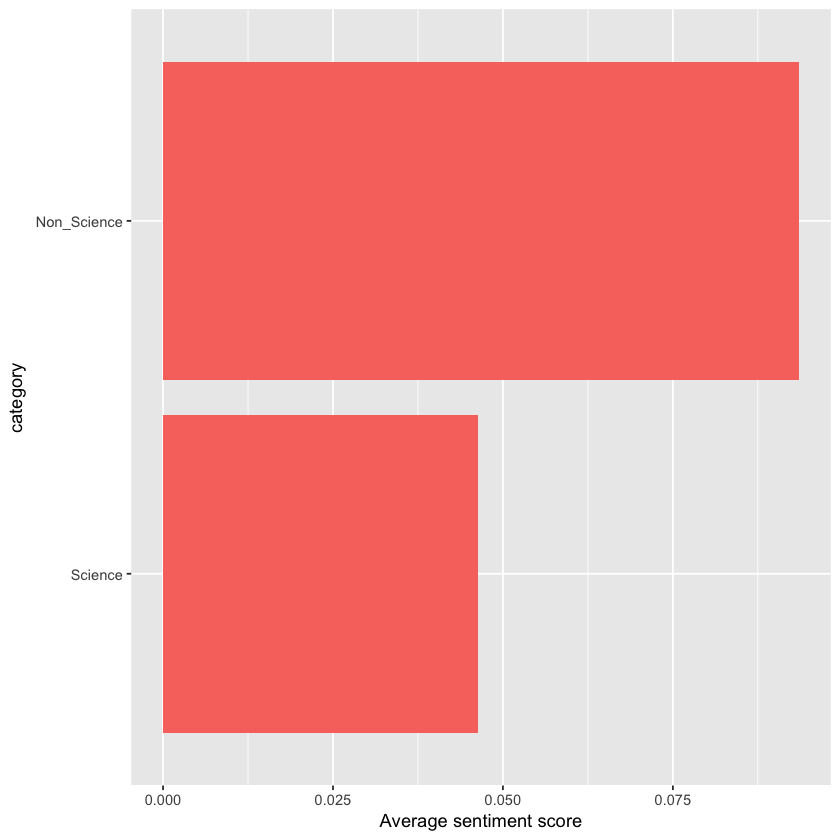

In [104]:
#AFINN LEXICON_감성사전에 따라서 다른 결과값
category_sentiments <- words_by_category %>%
 inner_join(get_sentiments("afinn"), by = "word") %>%
 group_by(category) %>%
 summarize(score = sum(score * n)/sum(n))

# #BING LEXICON
# category_sentiments <- words_by_category %>%
#  inner_join(get_sentiments("bing"), by = "word") %>%
#  group_by(category) %>%
#  summarize(score = sum(score * n)/sum(n))
 
category_sentiments %>%
 mutate(category = reorder(category, score)) %>%
 ggplot(aes(category, score, fill = score >0)) +
 geom_col(show.legend = FALSE) +
 coord_flip() +
 ylab("Average sentiment score")

In [105]:
#get_sentiments("bing")

### 3. 테드에듀 코퍼스 분석 - N-Gram Analysis
- most common bigrams for collocation learning 

In [13]:
cleaned_text <- raw_text %>%
 group_by(category, id) %>%
 mutate(linenumber = row_number()) %>%
 ungroup()


In [ ]:
# Tibble data가 되어야 하는 듯

In [108]:
ted_bigrams <- cleaned_text %>%
  unnest_tokens(bigram, text, token = "ngrams", n = 2)

ted_bigram_counts <- ted_bigrams %>%
 count(category, bigram, sort = TRUE) %>%
 ungroup() %>% 
 separate(bigram, c("word1", "word2"), sep = " ")  

ERROR: Error in mutate_impl(.data, dots): 잘못된 인자의 유형입니다


### 4. 테드에듀 코퍼스 분석 II: Network of Bigrams

In [69]:
#install.packages('wordcloud')
library(wordcloud)

raw_text %>%
 anti_join(stop_words) %>%
 count(word, by ="") %>%
 with(wordcloud(word, n, max.words = 100))

ERROR: Error: No common variables. Please specify `by` param.


### 하면서 어려웠던 점

- 우선, raw data의 전처리과정은 알다시피 꽤 힘들다
- 그러므로 텍스트 파일을 전처리할 때, structure를 잘 고민을 하도록 한다
- one token per document per row를 잘 고려한다
- Text Mining with R이 매우 상세하게 설명해주어서 매우 좋았지만, gutenberg의 다양한 코퍼스와 나의 코퍼스의 구조적 차이점 때문인지
  시행착오가 많았다(앞으로도 한동안...). 텍스트파일 구조를 다시 바꾼후 wordcloud와 N-grams을 그려보면 되지 않을까 싶다. 
- 이것을 이해하면 책에 나온 코드를 이용해서 R로 텍스트마이닝을 잘 할 수 있을 것 같다. 